# Peak centroid reconstruction check

This verifies that the code for doing peak center reconstruction matches dataset.sinohist + roi_iradon

In [1]:
exec(open('/data/id11/nanoscope/install_ImageD11_from_git.py').read())
PYTHONPATH = setup_ImageD11_from_git( os.path.join( os.environ['HOME'],'git'), 'ImageD11_clean' )

# Setting path via: 
sys.path.insert(0, /home/esrf/wright/git/ImageD11_clean )
# Running from: /home/esrf/wright/git/ImageD11_clean/ImageD11/__init__.py


In [2]:
import ImageD11.sinograms.dataset
import ImageD11.sinograms.roi_iradon
import numpy as np, pylab as pl

In [3]:
dset = 'processed/Si_cube/Si_cube_S3DXRD_nt_moves_dty/Si_cube_S3DXRD_nt_moves_dty_dataset.h5'
if not os.path.exists(dset):
    print("Run the crystal refine notebook first to get the data")
    raise

In [4]:
ds = ImageD11.sinograms.dataset.load(dset)

In [5]:
cf_4d = ds.get_cf_4d()

In [6]:
%%time
y0 = 24.24
img = ImageD11.sinograms.roi_iradon.recon_cens(
    cf_4d.omega,cf_4d.dty,ds.ybincens,len(ds.ybincens)+1,cf_4d.sum_intensity,y0 = y0)

CPU times: user 5.79 ms, sys: 1.4 ms, total: 7.19 ms
Wall time: 8.01 ms


In [7]:
%%time
sino = ds.sinohist( weights = cf_4d.sum_intensity,
                    omega = cf_4d.omega,
                    dty = cf_4d.dty )

CPU times: user 1.25 ms, sys: 948 µs, total: 2.2 ms
Wall time: 1.33 ms


In [8]:
%%time
ref_recon = ImageD11.sinograms.roi_iradon.run_iradon( sino.T, ds.obincens, pad=0, shift=-y0/ds.ystep)

CPU times: user 100 ms, sys: 4.55 ms, total: 105 ms
Wall time: 103 ms


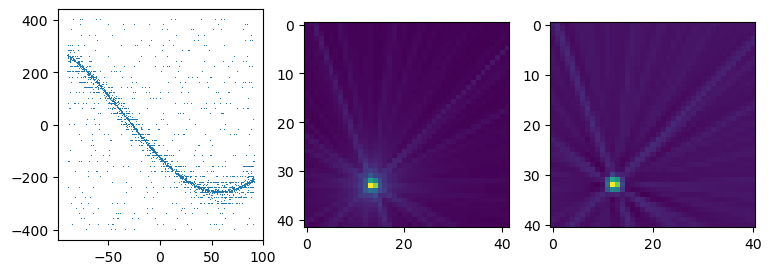

In [9]:
f, a = pl.subplots(1,3,figsize=(9,3))
a[1].imshow(img)
a[2].imshow(ref_recon)
a[0].plot(cf_4d.omega, cf_4d.dty, ',')